<div dir="rtl">
<font size=5>
Improving Image Quality (Super-Resolution) with Custom CNN
</font>
</div>

<div dir="rtl">
<font size="4">
<li>✅ <strong>Data Preparation:</strong> Use a standard dataset (CIFAR-10) and create data pairs (poor image, high quality image) by downsampling the original images.</li>
<li>✅ <strong>Building a Super-Resolution Model:</strong> Design a custom CNN architecture that includes layers to increase the image dimensions such as <strong><code>Conv2DTranspose</code></strong> or <strong><code>UpSampling2D</code></strong>.</li>
<li>✅ <strong>Choosing an appropriate Loss Function:</strong> Use functions such as <code>Mean Squared Error (MSE)</code> or <code>Mean Absolute Error (MAE)</code> To compare the generated image pixel by pixel with the original image.</li>
<li>✅ <strong>Model training and validation:</strong> Train the model to minimize the difference between the reconstructed image and the real high-quality image.</li>
<li>✅ <strong>Result evaluation and visualization:</strong> Display a triplet of images (low-quality input, model output, and high-quality target) to visually evaluate the model's performance.</li>
</font>
</font>
</div>
<br>
<div dir="rtl">
<h2><strong>Dataset</strong></h2>
<li> We use the <strong>CIFAR-10</strong> dataset, which is available by default in Keras and does not require manual download.</li>
<li>This dataset contains <strong>60,000 color images</strong> with dimensions <code>32x32</code> pixels. We will use these images as high-resolution versions and produce the low-resolution versions ourselves.</li>
</font>
</div>

<br><br>
<div dir="rtl"> <font size="5">1. Load the required libraries</font> </div>
<br>

In [1]:
# TODO: Import the required libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np

<br><br>
<div dir="rtl"> <font size="5">2. Loading and Preparing the Dataset</font> </div>
<br>
<div dir="rtl">
<font size=4>
In this section, we load the CIFAR-10 dataset and prepare it for the Super-Resolution problem.
<br><br>
<strong>Steps:</strong>
<li>1. Load the CIFAR-10 dataset. We only need the images (x_train, x_test) and the labels (y_train, y_test) are not relevant in this exercise.</li>
<li>2. Normalize the pixel values ​​to the range <code>[0, 1]</code>. This will help in the stability of the model training.</li>
<li>3. Load the Cifar10 dataset into the project via Tensorflow.</li>
</font>
</div>

In [2]:
# TODO: Load the CIFAR-10 dataset.

(x_train, y_train), (x_val, y_val) = cifar10.load_data()

In [3]:
# Check the shape of the original data
print('Shape of training data:', x_train.shape)
print('Shape of test data:', x_val.shape)

Shape of training data: (50000, 32, 32, 3)
Shape of test data: (10000, 32, 32, 3)


<br>
<div dir="rtl">
<font size=4>
Convert the pixel values ​​to float32 and normalize them to the range [0, 1].
</font>
</div>

In [4]:
# TODO: Convert pixel values ​​to float32 and normalize to the range [0, 1].

x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0

print('Pixel value after normalization - minimum:', x_train.min(), 'Maximum:', x_train.max())

Pixel value after normalization - minimum: 0.0 Maximum: 1.0


<br />
<div dir="rtl">
<font size="4">
In this section, the dimensions of the high-resolution (<strong>High Resolution - HR</strong
>) and low-resolution (<strong>Low Resolution - LR</strong>) images are specified.
The original images are <strong>32×32</strong>, but to simulate the low-resolution version, we reduce the same images to <strong>16×16</strong> dimensions.
This helps the model to learn
how to reconstruct clearer and more accurate versions from smaller, less detailed images.
</font>
</div>

In [5]:
# TODO: Define dimensions of high-quality (HR) and low-quality (LR) images


def create_hr_lr_pairs(images, lr_size=(16, 16)):
    """
    Create High-Resolution and Low-Resolution data pairs

    Parameters:
    - images: Original images with dimensions 32x32
    - lr_size: Dimensions of Low-Resolution images (default: 16x16)
    - hr_size: Dimensions of High-Resolution images (default: 32x32)
    """
    # Create Low-Resolution images by reducing dimensions
    lr_images = tf.image.resize(images, lr_size, method='bicubic')



    return lr_images, images # (model input, training target)


<br><br>
<div dir="rtl"> <font size="5">3. ​​Generating pairs of low-quality and high-quality data</font> </div>
<br>
<div dir="rtl">
<font size="4">
Our model needs to learn how to create a high-quality image (High Resolution (HR)) from a low-quality image (Low Resolution (LR)). To do this, we need to prepare the training data in the form of pairs (LR, HR).
<br><br>
<strong>Task:</strong>
<li>Using the <code>tf.image</code> function, reduce the high-quality images to half their size (e.g. from 32x32 to 16x16) to create low-quality (LR) versions of them.</li>
<li>These LR images will be used as input to the model and the HR images will be used as target output.</li>
</font>
</div><br>

In [6]:
x_train_lr, y_train_hr = create_hr_lr_pairs(x_train)
x_val_lr, y_val_hr = create_hr_lr_pairs(x_val)

print("High-Resolution image dimensions (model target)",y_train_hr.shape)
print("Low-Resolution image dimensions (model input)",x_train_lr.shape)

High-Resolution image dimensions (model target) (50000, 32, 32, 3)
Low-Resolution image dimensions (model input) (50000, 16, 16, 3)


<br><br>
<div dir="rtl"> <font size="5">4. Data visualization</font> </div>
<div dir="rtl">
<font size="4">
To better understand the data, display an example of low-quality images (the model input) and high-quality images (the desired output) side by side.
</font>
</div><br>

In [7]:
import matplotlib.pyplot as plt

In [8]:
# TODO: Write a function to display an LR and HR image side by side.
def visualize_hr_lr_comparison(lr_images, hr_images, num_samples=3):
    """Comparative display of low-resolution and high-resolution images"""

    fig, axes = plt.subplots(num_samples, 2, figsize=(10, 4*num_samples))

    for i in range(num_samples):
        idx = np.random.randint(0, len(lr_images))

        # تصویر Low-Resolution (16x16)
        axes[i, 0].imshow(lr_images[idx])
        axes[i, 0].set_title(f'Low-Resolution\nModel Input - Dimensions: {lr_images[idx].shape[:2]}')
        axes[i, 0].axis('off')

        # تصویر High-Resolution (32x32)
        axes[i, 1].imshow(hr_images[idx])
        axes[i, 1].set_title(f'High-Resolution\nModel Target - Dimensions: {hr_images[idx].shape[:2]}')
        axes[i, 1].axis('off')

    plt.tight_layout()
    # plt.savefig("../plots/visualize-hr-lr-comparison.png")
    plt.show()

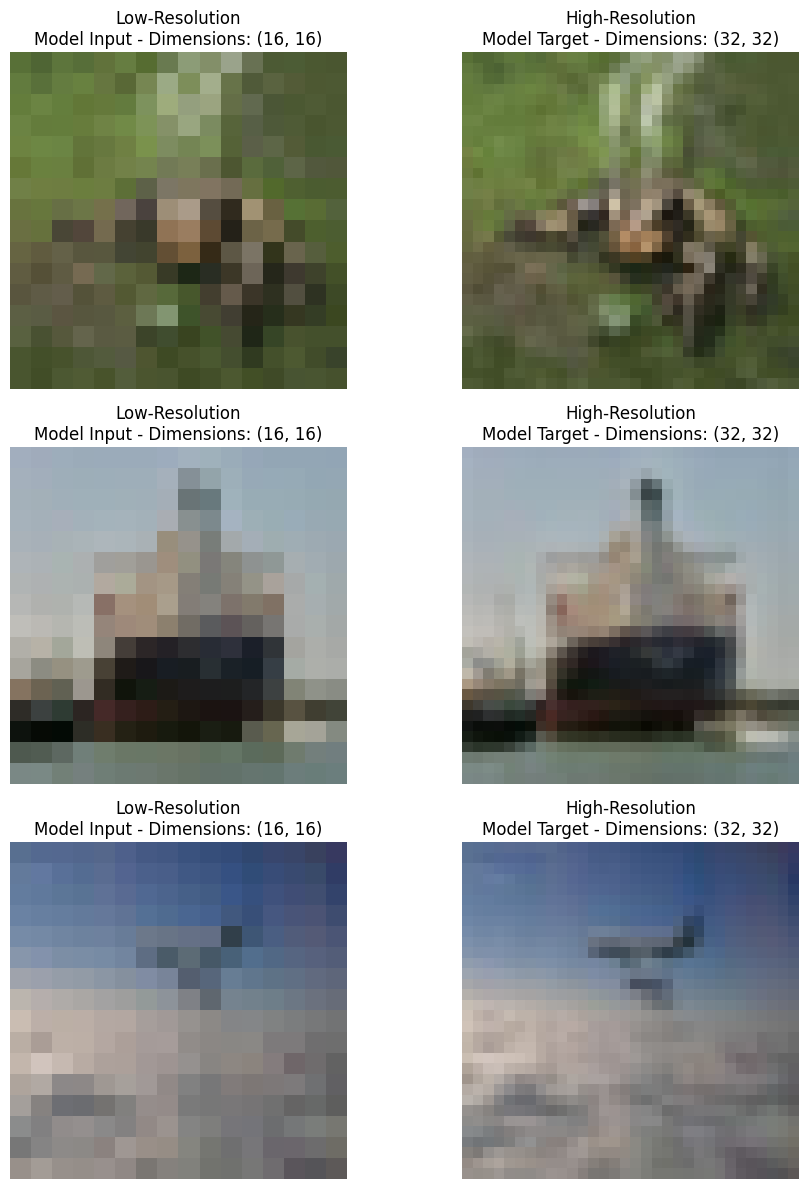

In [9]:
# TODO: Display a sample of the training data
visualize_hr_lr_comparison(x_train_lr, y_train_hr)

In [10]:
from sklearn.model_selection import train_test_split

x_train_lr_np = np.array(x_train_lr)
y_train_hr_np = np.array(y_train_hr)

x_train_lr, x_test_lr, y_train_hr, y_test_hr = train_test_split(
    x_train_lr_np, # Use the Low-Resolution data you created
    y_train_hr_np, # Use the High-Resolution data you created
    test_size=0.01,
    random_state=42
)

In [11]:
AUTOTUNE = tf.data.AUTOTUNE
BATCH_SIZE = 64

# Training dataset: LR input and HR target
train_ds = tf.data.Dataset.from_tensor_slices((x_train_lr, y_train_hr))
train_ds = train_ds.cache() \
                   .shuffle(buffer_size=len(x_train_lr)) \
                   .batch(BATCH_SIZE) \
                   .prefetch(AUTOTUNE)
# Validation dataset: only LR and HR, no shuffle
val_ds   = tf.data.Dataset.from_tensor_slices((x_val_lr, y_val_hr))
val_ds   = val_ds .cache() \
               .batch(BATCH_SIZE) \
               .prefetch(AUTOTUNE)

# Test dataset: only LR and HR, no shuffle
test_ds  = tf.data.Dataset.from_tensor_slices((x_test_lr, y_test_hr))
test_ds  = test_ds .cache() \
               .batch(BATCH_SIZE) \
               .prefetch(AUTOTUNE)

In [12]:
print("len train_ds:",len(train_ds))
print("len val_ds:",len(val_ds))
print("len test_ds:",len(test_ds))

len train_ds: 774
len val_ds: 157
len test_ds: 8


<br /><br />

<div dir="rtl"><font size="5">5. Building the Super-Resolution Model Architecture</font></div>
<br />
<div dir="rtl">
<font size="4">
In this section, we design the CNN model architecture for the <strong>Super-Resolution</strong> task.
This model takes an <strong>LR</strong> image as input and produces a higher resolution (HR) image as output.
<br /><br />


<div dir="rtl"> <font size="4">To read about the UpSampling2D and Conv2DTranspose layers, refer to the links below.</font> </div>

* Basic Resouces:
  * [Conv2DTranspose | Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose)
  * [UpSampling2D | Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D)

* Advanced Resources:
  * [Deconvolution and Checkerboard Artifacts](https://distill.pub/2016/deconv-checkerboard/)
  * [Understanding Transposed Convolution](https://towardsdatascience.com/transposed-convolution-demystified-84ca81b4baba/)

  <br><br>

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [15]:
# TODO: Create Super Resolution function
def build_sr_model(lr_shape):

    inputs = layers.Input(shape=lr_shape)

    # --- Feature Extraction ---
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(inputs)
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)

    # --- Conv2DTranspose ---
    x = layers.Conv2DTranspose(128, 3, strides=2, padding='same',activation='relu')(x)



    # --- Refinement ---
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)


    # --- Output Layer ---
    outputs = layers.Conv2D(3, 3, padding='same', activation='sigmoid')(x)

# Making the final model
    model = models.Model(inputs, outputs)

    return model


In [16]:
# TODO: Build the model
model = build_sr_model(lr_shape=((16, 16, 3)))

In [17]:
# TODO: Show model architecture summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 16, 16, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 16, 16, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 32, 32, 128)    │        73,856 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 3)      │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,027 (879.01 KB)

 Trainable params: 225,027 (879.01 KB)

 Non-trainable params: 0 (0.00 B)

<br><br>
<div dir="rtl"> <font size="5">6. Model Training</font> </div>
<div dir="rtl">
<font size="4">
Now we train the model using the prepared data. Use callbacks if needed.

In [18]:
# Compile the model
import tensorflow as tf
from keras.saving import register_keras_serializable
# PSNR
@register_keras_serializable()
def psnr_metric(y_true, y_pred):
    return tf.reduce_mean(tf.image.psnr(y_true, y_pred, max_val=1.0))

# SSIM
@register_keras_serializable()
def ssim_metric(y_true, y_pred):
    return tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))

model.compile(
    optimizer='adam',
    loss='mse',  # Suitable for Super-Resolution
    metrics=['mae',ssim_metric, psnr_metric]
)


In [19]:
# TODO: Implement Callbacks functions if needed.
from tensorflow.keras import callbacks

#Early Stopping to Prevent Overfitting
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

#Learning rate decreases when the model does not improve Learning rate decreases when the model does not improve
reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

# Save the best model
model_checkpoint = callbacks.ModelCheckpoint(
    filepath='./sample_data/best_sr_model.keras',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)




In [20]:
# Disable XLA
tf.config.optimizer.set_jit(False)

In [ ]:
# TODO: Train the model.

# Use the training data to train the model and the test data for validation.

history = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
    callbacks=[
        early_stopping,
        reduce_lr,
        model_checkpoint
    ],
    verbose=1
)

Epoch 1/20
774/774 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0110 - mae: 0.0695 - psnr_metric: 22.4263 - ssim_metric: 0.7609
Epoch 1: val_loss improved from inf to 0.00352, saving model to ./sample_data/best_sr_model.keras
774/774 ━━━━━━━━━━━━━━━━━━━━ 26s 25ms/step - loss: 0.0110 - mae: 0.0694 - psnr_metric: 22.4294 - ssim_metric: 0.7610 - val_loss: 0.0035 - val_mae: 0.0451 - val_psnr_metric: 24.9014 - val_ssim_metric: 0.8778 - learning_rate: 0.0010
Epoch 2/20
771/774 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0026 - mae: 0.0358 - psnr_metric: 26.4832 - ssim_metric: 0.8843
Epoch 2: val_loss improved from 0.00352 to 0.00240, saving model to ./sample_data/best_sr_model.keras
774/774 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - loss: 0.0026 - mae: 0.0358 - psnr_metric: 26.4843 - ssim_metric: 0.8843 - val_loss: 0.0024 - val_mae: 0.0337 - val_psnr_metric: 26.8690 - val_ssim_metric: 0.8913 - learning_rate: 0.0010
Epoch 3/20
772/774 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0024 - mae: 0.0335 - 

<br><br>
<div dir="rtl"> <font size="5">7. Plotting the Cost Function (Loss)</font> </div>
<div dir="rtl">
<font size="4">
Plot the cost function for the training and validation data to examine the learning process of the model.
</font>
</div>

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_history(history):
    """
    Plots the Loss plot for the training and validation data.

    Args:
    history: The History object returned by the model.fit method.
    """
    # استخراج مقادیر Loss
    loss = history.history.get('loss')
    val_loss = history.history.get('val_loss')
    epochs = range(1, len(loss) + 1)

    # ترسیم نمودار
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, loss, 'b-', label='Teaching error')
    plt.plot(epochs, val_loss, 'r--', label='Validation error')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel("Loss", fontsize=12)
    plt.title('Error change trend in training and validation', fontsize=14)
    plt.legend()
    plt.grid(True)
    
    plt.savefig(f"../plot-loss-history-plots.png")
    plt.show()


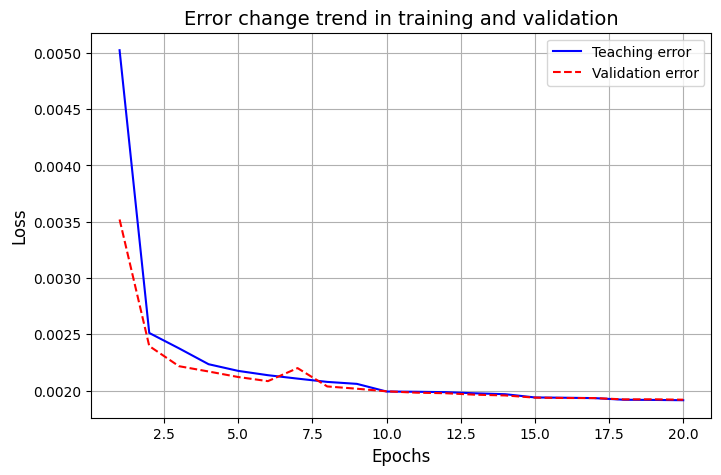

In [23]:
plot_loss_history(history)


<br /><br />
<div dir="rtl"><font size="5">8. Final Evaluation and Visualization of Results</font></div>
<br />
<div dir="rtl">
<font size="4">
In this section, you visually evaluate the performance of the Super-Resolution model.
The goal is to see how well the model has reproduced details.
<br /><br />
<strong>Your task:</strong>
<li>
Use the trained model to make predictions on a few random samples of the test data.
</li>
<li>
Then, for each sample, display three images side by side:
<li>
Low-Resolution (LR) input image: The image that the model received as input.
</li>
<li>
Super-Res (Predicted) image: The image that your model predicted with high quality.
</li>
<li>
Ground Truth HR: The original image that the model was supposed to reconstruct (the target of the model).
</li>
</li>
By comparing these three images, you can evaluate the visual quality of the model's reconstruction and its ability to add detail.
</font>
</div>

In [24]:
from tensorflow.keras.models import load_model
best_model = load_model("./sample_data/best_sr_model.keras")

In [ ]:
# TODO: Predict high-quality images from low-quality test images using the trained model.

import matplotlib.pyplot as plt
import numpy as np

def predict_and_show_triplets(model, test_ds, num_samples=5):
    """
        Displays some samples of LR, SR, HR images.

        Args:
        model: Trained model
        test_ds: Test dataset (LR, HR)
        num_samples: Number of samples to display
    """
    # گرفتن یک batch از test_ds
    for lr_batch, hr_batch in test_ds.take(1):
        # پیش‌بینی روی LR
        sr_batch = model.predict(lr_batch)

        # انتخاب تعدادی نمونه
        for i in range(num_samples):
            lr = lr_batch[i].numpy()
            sr = sr_batch[i]
            hr = hr_batch[i].numpy()

            # رسم سه‌تایی
            plt.figure(figsize=(12, 4))

            plt.subplot(1, 3, 1)
            plt.imshow(np.clip(lr, 0, 1))
            plt.title("LR (Poor quality input)")
            plt.axis("off")

            plt.subplot(1, 3, 2)
            plt.imshow(np.clip(sr, 0, 1))
            plt.title("SR (Model output)")
            plt.axis("off")

            plt.subplot(1, 3, 3)
            plt.imshow(np.clip(hr, 0, 1))
            plt.title("HR (Real quality)")
            plt.axis("off")
            plt.savefig(f"../plots/sample-predict-and-show-triplets{i+1}.png")
            plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step 


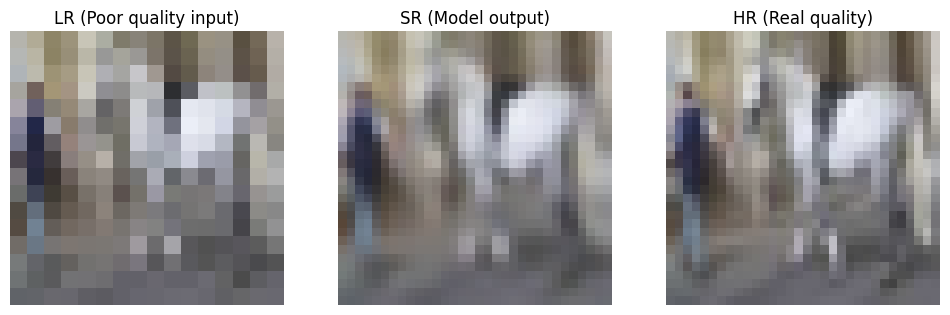

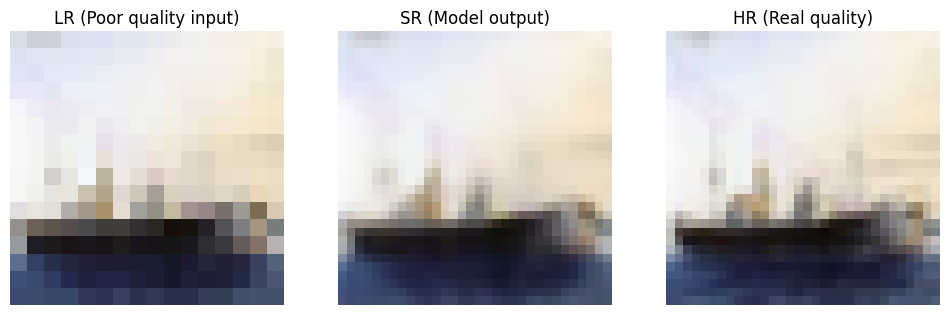

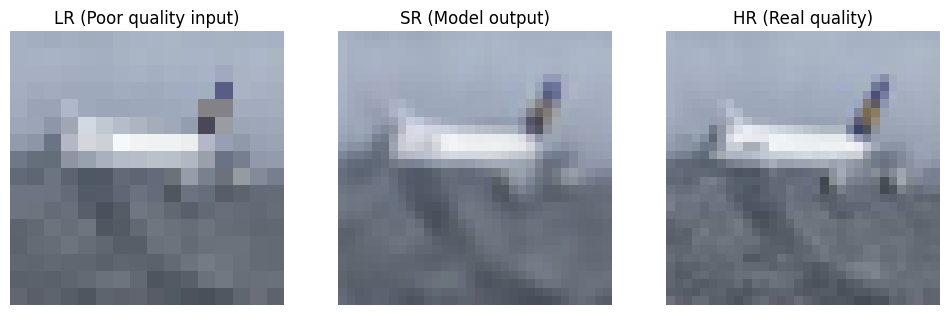

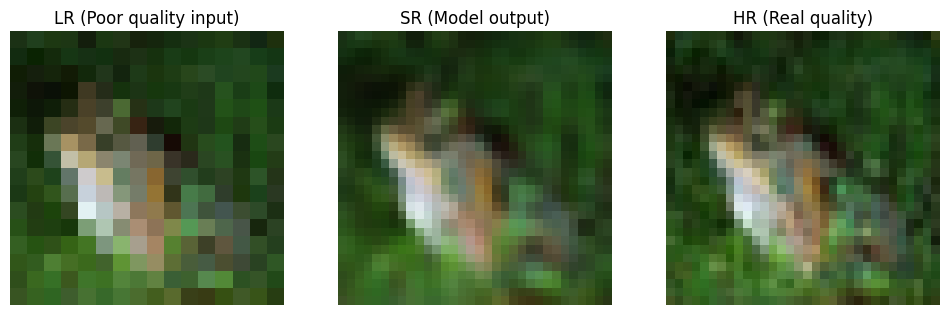

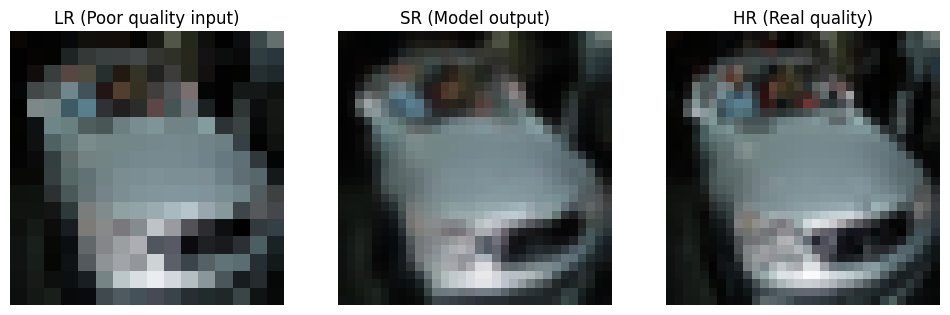

In [26]:
# TODO: Write a function to display a triplet of images.
best_model = tf.keras.models.load_model(
    "./sample_data/best_sr_model.keras",
    custom_objects={"psnr_metric": psnr_metric, "ssim_metric": ssim_metric}
)

predict_and_show_triplets(best_model, test_ds, num_samples=5)


<br /><br />
<div dir="rtl">
<font size="4">
<div dir="rtl">
<font size="5">9. Quantitative Evaluation Using PSNR  and SSIM</font> </div>
</font>


In [27]:
# TODO: Calculate PSNR for the entire test set
# Use the psnr function from TensorFlow to calculate the Peak Signal-to-Noise Ratio (PSNR)

import tensorflow as tf
import numpy as np

def evaluate_psnr_ssim(model, test_ds):
    psnr_values = []
    ssim_values = []

    for lr, hr in test_ds:
        # پیش‌بینی روی LR
        sr = model.predict(lr, verbose=0)

        # محاسبه PSNR
        batch_psnr = tf.image.psnr(
            tf.clip_by_value(sr, 0.0, 1.0),
            tf.clip_by_value(hr, 0.0, 1.0),
            max_val=1.0
        )

        # محاسبه SSIM
        batch_ssim = tf.image.ssim(
            tf.clip_by_value(sr, 0.0, 1.0),
            tf.clip_by_value(hr, 0.0, 1.0),
            max_val=1.0
        )

        psnr_values.extend(batch_psnr.numpy())
        ssim_values.extend(batch_ssim.numpy())

    return {
        "psnr_mean": np.mean(psnr_values),
        "psnr_std": np.std(psnr_values),
        "ssim_mean": np.mean(ssim_values),
        "ssim_std": np.std(ssim_values),
    }






In [28]:
results = evaluate_psnr_ssim(best_model, test_ds)
print(f"PSNR mean: {results['psnr_mean']:.2f} dB ± {results['psnr_std']:.2f}")
print(f"SSIM mean: {results['ssim_mean']:.4f} ± {results['ssim_std']:.4f}")

PSNR mean: 28.13 dB ± 2.83
SSIM mean: 0.9077 ± 0.0395


In [29]:
results = best_model.evaluate(test_ds, verbose=1)

for name, value in zip(best_model.metrics_names, results):
    print(f"{name}: {value:.4f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - loss: 0.0019 - mae: 0.0280 - psnr_metric: 28.2412 - ssim_metric: 0.9078
loss: 0.0019
compile_metrics: 0.0280
